In [1]:
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
from sklearn import datasets
digits = datasets.load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
print(type(digits.images))
print(type(digits.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
digits.images.shape

(1797, 8, 8)

In [6]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


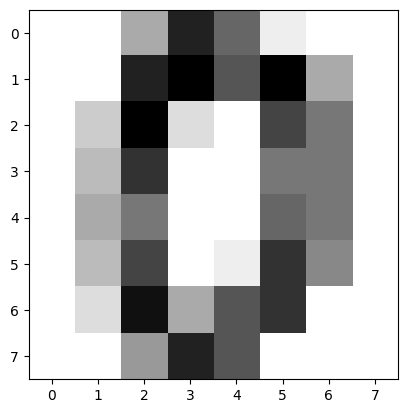

In [7]:
plt.imshow(digits.images[0],cmap='binary')
plt.show()

In [8]:
print (digits.target.shape)
print (digits.target)

(1797,)
[0 1 2 ... 8 9 8]


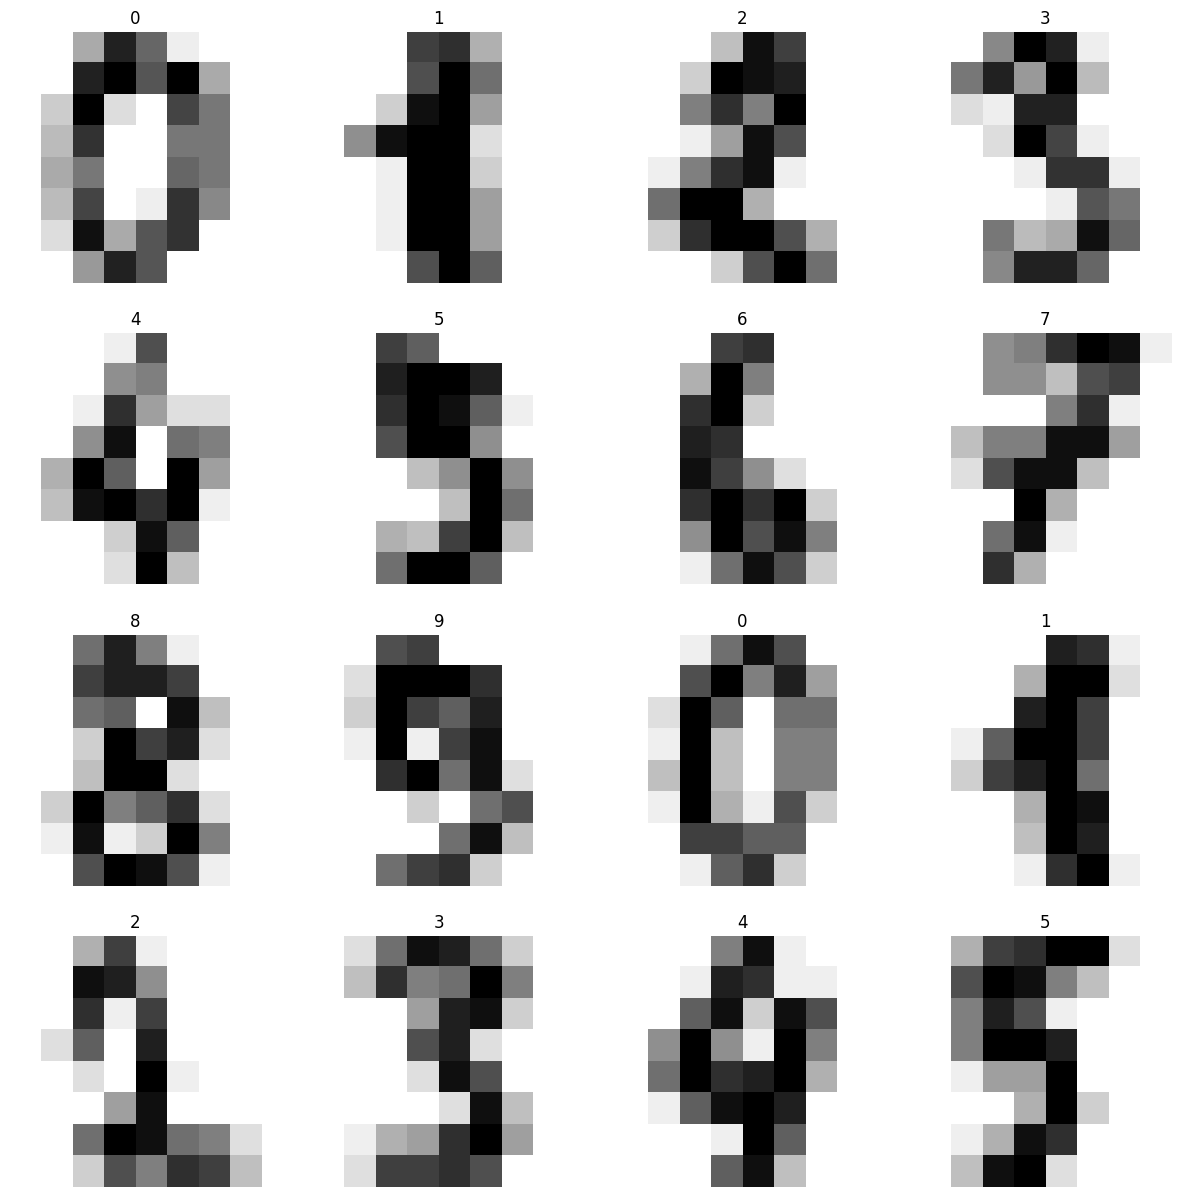

In [9]:
def plot_multi(i):
    '''Plots 16 digits, starting with digit i'''
    nplots = 16
    fig = plt.figure(figsize=(15,15))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        plt.imshow(digits.images[i+j], cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    plt.show()
    
plot_multi(0)

In [10]:
y = digits.target
x = digits.images.reshape((len(digits.images), -1))
x.shape

(1797, 64)

In [11]:
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [27]:
x_train = x[:1000]
y_train = y[:1000]
x_test = x[1000:]
y_test = y[1000:]
print(x_train.shape)
print(x_test.shape)
print(digits.images.shape)
print(digits.images[0].shape)

(1000, 64)
(797, 64)
(1797, 8, 8)
(8, 8)


In [13]:
from sklearn.neural_network import MLPClassifier

# mlp = MLPClassifier(hidden_layer_sizes=(50, 30, 20), max_iter=1000)
mlp = MLPClassifier(hidden_layer_sizes=(15,), verbose=True)

In [14]:
mlp.fit(x_train,y_train)

Iteration 1, loss = 8.45009708
Iteration 2, loss = 6.75320594
Iteration 3, loss = 5.48221341
Iteration 4, loss = 4.57292840
Iteration 5, loss = 3.96633760
Iteration 6, loss = 3.50680863
Iteration 7, loss = 3.17559800
Iteration 8, loss = 2.91339799
Iteration 9, loss = 2.70935308
Iteration 10, loss = 2.55797657
Iteration 11, loss = 2.44088009
Iteration 12, loss = 2.34481133
Iteration 13, loss = 2.26745189
Iteration 14, loss = 2.20166304
Iteration 15, loss = 2.14448388
Iteration 16, loss = 2.08924078
Iteration 17, loss = 2.03798681
Iteration 18, loss = 1.98843322
Iteration 19, loss = 1.93843913
Iteration 20, loss = 1.88726669
Iteration 21, loss = 1.83723001
Iteration 22, loss = 1.78528524
Iteration 23, loss = 1.73244467
Iteration 24, loss = 1.67725289
Iteration 25, loss = 1.62153198
Iteration 26, loss = 1.56526984
Iteration 27, loss = 1.50744225
Iteration 28, loss = 1.45138736
Iteration 29, loss = 1.39762598
Iteration 30, loss = 1.34550669
Iteration 31, loss = 1.29298777
Iteration 32, los

d:\Program Files\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(15,), verbose=True)

In [15]:
predictions = mlp.predict(x_test)
predictions[:50] 
# we just look at the 1st 50 examples in the test sample


array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 7, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0])

In [16]:
y_test[:50] 
# true labels for the 1st 50 examples in the test sample

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0])

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8745294855708908

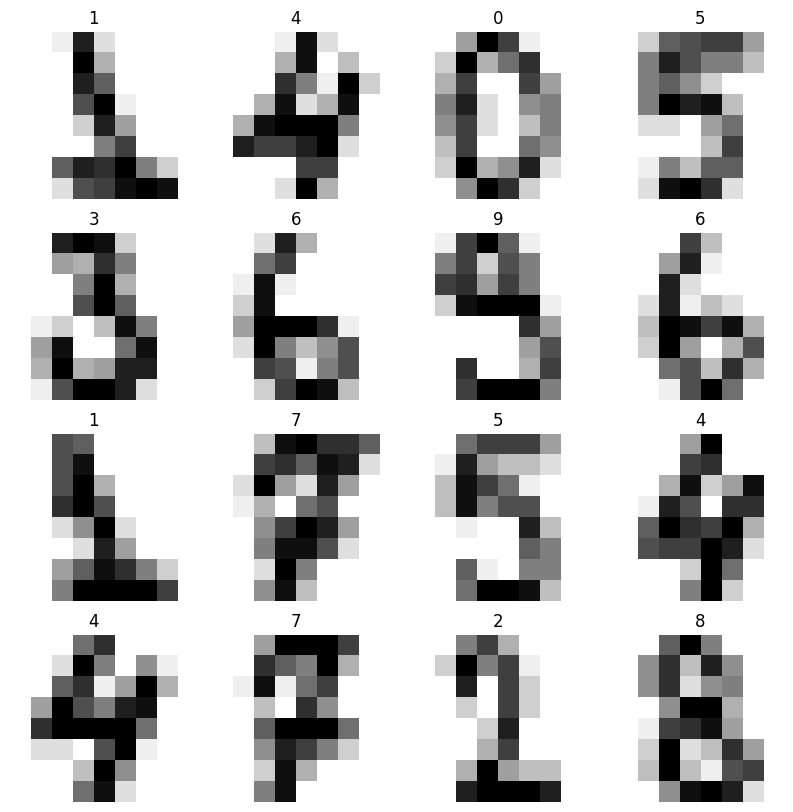

In [18]:
def plot_multi_pred(i, images, pred, nplots = 16):
    fig = plt.figure(figsize=(10,10))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        plt.imshow(images[i+j].reshape(8, 8), cmap='binary')
        plt.title(pred[i+j])
        plt.axis('off')
    plt.show()
plot_multi_pred(0, x_test, predictions)

In [19]:
from PIL import Image as img
import os

In [20]:
i = 0
listdir = os.listdir(os.getcwd() + "/Images")
image_arrays = np.array([[[0 for i in range(8)] for i in range(8)] for i in range(len(listdir))])
for filename in listdir:
    image = img.open(os.path.join(os.getcwd()+ "/Images", filename))
    image_arrays[i] = np.array(image)
    i += 1

In [21]:
image_arrays[1]

array([[ 0,  0,  0, 12, 13,  5,  0,  0],
       [ 0,  0,  0, 11, 16,  9,  0,  0],
       [ 0,  0,  3, 15, 16,  6,  0,  0],
       [ 0,  7, 15, 16, 16,  2,  0,  0],
       [ 0,  0,  1, 16, 16,  3,  0,  0],
       [ 0,  0,  1, 16, 16,  6,  0,  0],
       [ 0,  0,  1, 16, 16,  6,  0,  0],
       [ 0,  0,  0, 11, 16, 10,  0,  0]])

In [22]:
image_import = image_arrays.reshape((len(image_arrays), -1))
image_import.shape

(10, 64)

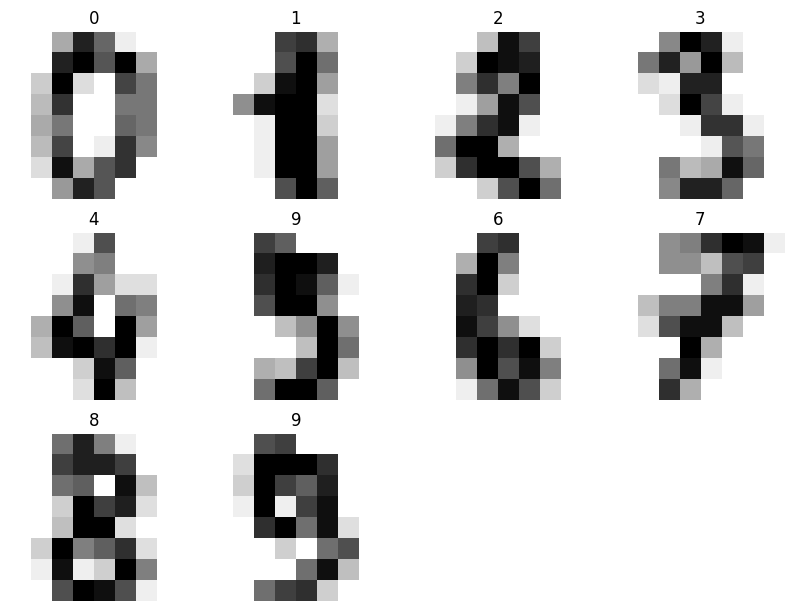

In [23]:
iamges_predictions = mlp.predict(image_import)
plot_multi_pred(0, image_import, iamges_predictions, nplots = len(image_import))

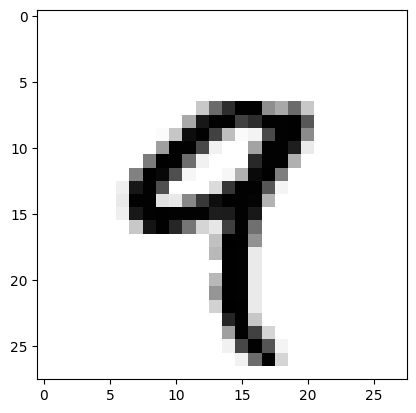

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

In [26]:
import idx2numpy
import numpy as np
file = 'Datasets/train-images-idx3-ubyte'
imagearray = idx2numpy.convert_from_file(file)

plt.imshow(imagearray[4], cmap='binary')
plt.show()
print(imagearray[4])